# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd0
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

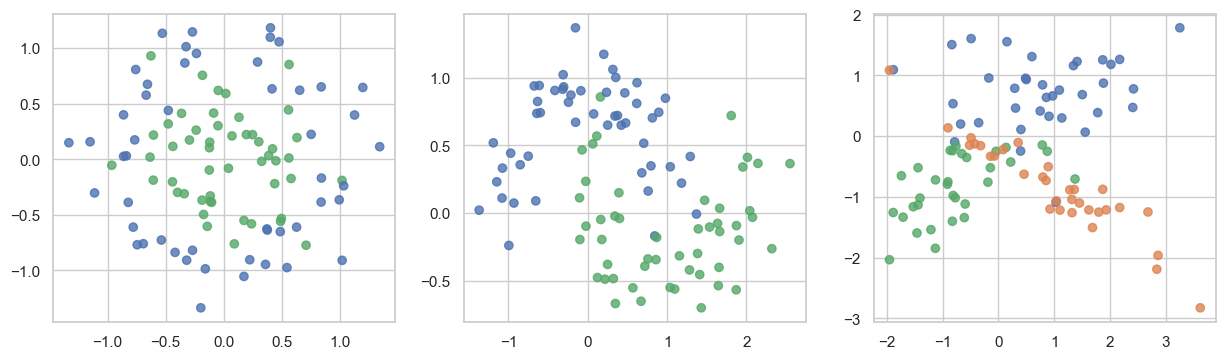

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

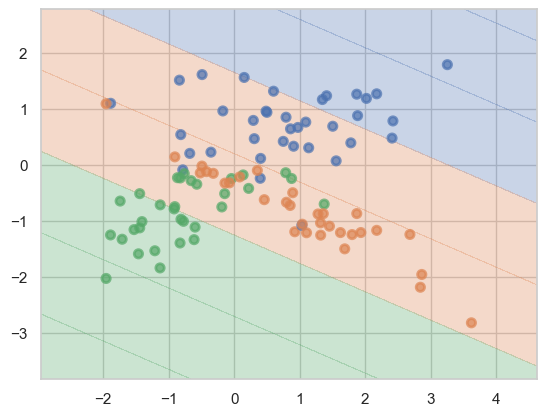

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Circles:
Accuracy на обучающей выборке: 1.0000
Accuracy на тестовой выборке: 0.8000
Разница, переобучение: 0.2000

Moons:
Accuracy на обучающей выборке: 1.0000
Accuracy на тестовой выборке: 0.9600
Разница, переобучение: 0.0400

Classification:
Accuracy на обучающей выборке: 1.0000
Accuracy на тестовой выборке: 0.7600
Разница, переобучение: 0.2400



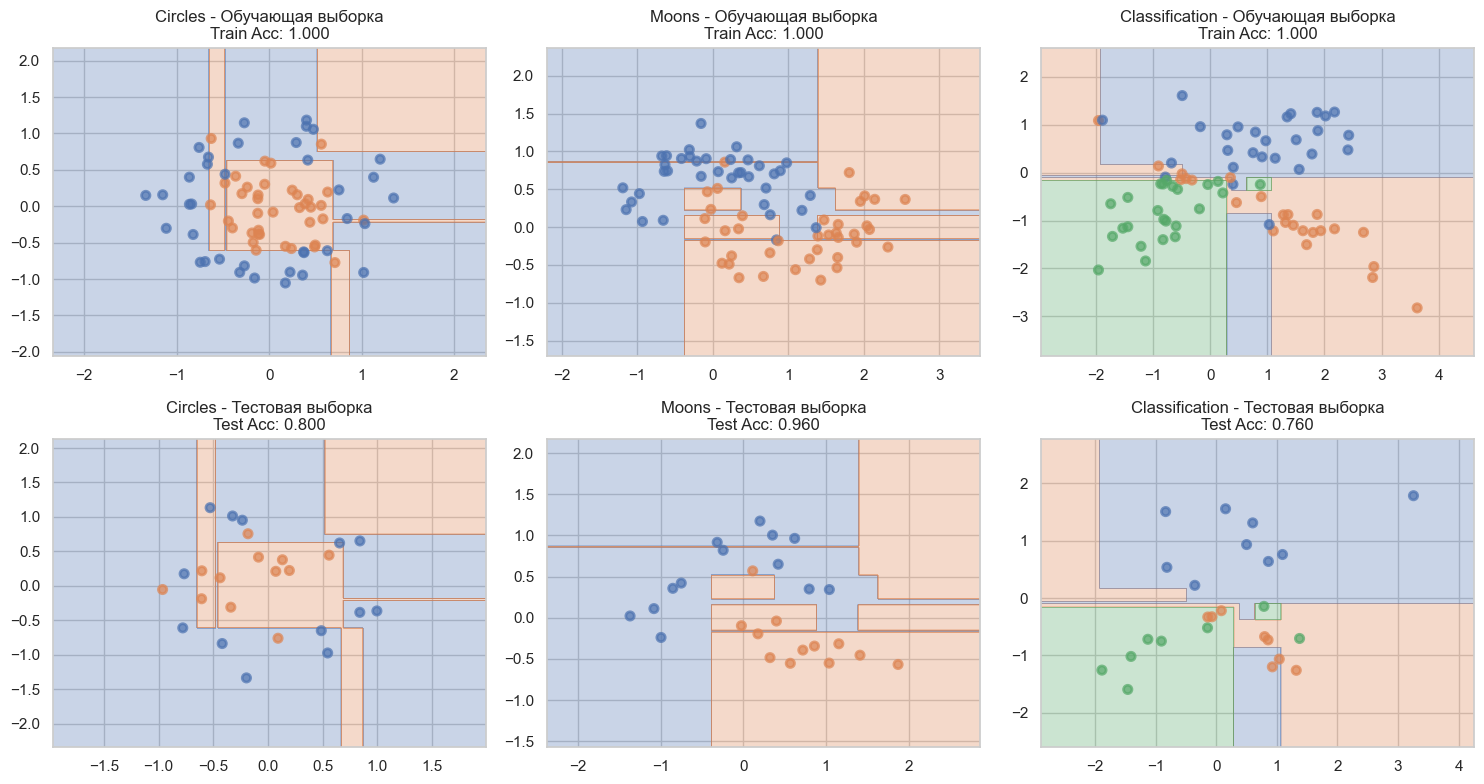

In [7]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(15, 8)) 

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25,stratify=y, random_state=42
    )

    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, tree.predict(X_train))
    test_acc = accuracy_score(y_test, tree.predict(X_test))
    diff = train_acc - test_acc

    if i == 0:
        name = "Circles"
    elif i == 1:
        name = "Moons"
    else:
        name = "Classification"

    print(f"{name}:")
    print(f"Accuracy на обучающей выборке: {train_acc:.4f}")
    print(f"Accuracy на тестовой выборке: {test_acc:.4f}")
    print(f"Разница, переобучение: {diff:.4f}\n")

    plt.subplot(2, 3, i + 1)
    plot_surface(tree, X_train, y_train)
    plt.title(f"{name} - Обучающая выборка\nTrain Acc: {train_acc:.3f}")

    plt.subplot(2, 3, i + 4)
    plot_surface(tree, X_test, y_test)
    plt.title(f"{name} - Тестовая выборка\nTest Acc: {test_acc:.3f}")

plt.tight_layout()
plt.show()


__Ответ:__
Да, деревья сильно переобучились. 

На всех трёх датасетах train accuracy = 1.0 (100%), 
а test accuracy значительно ниже.




__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

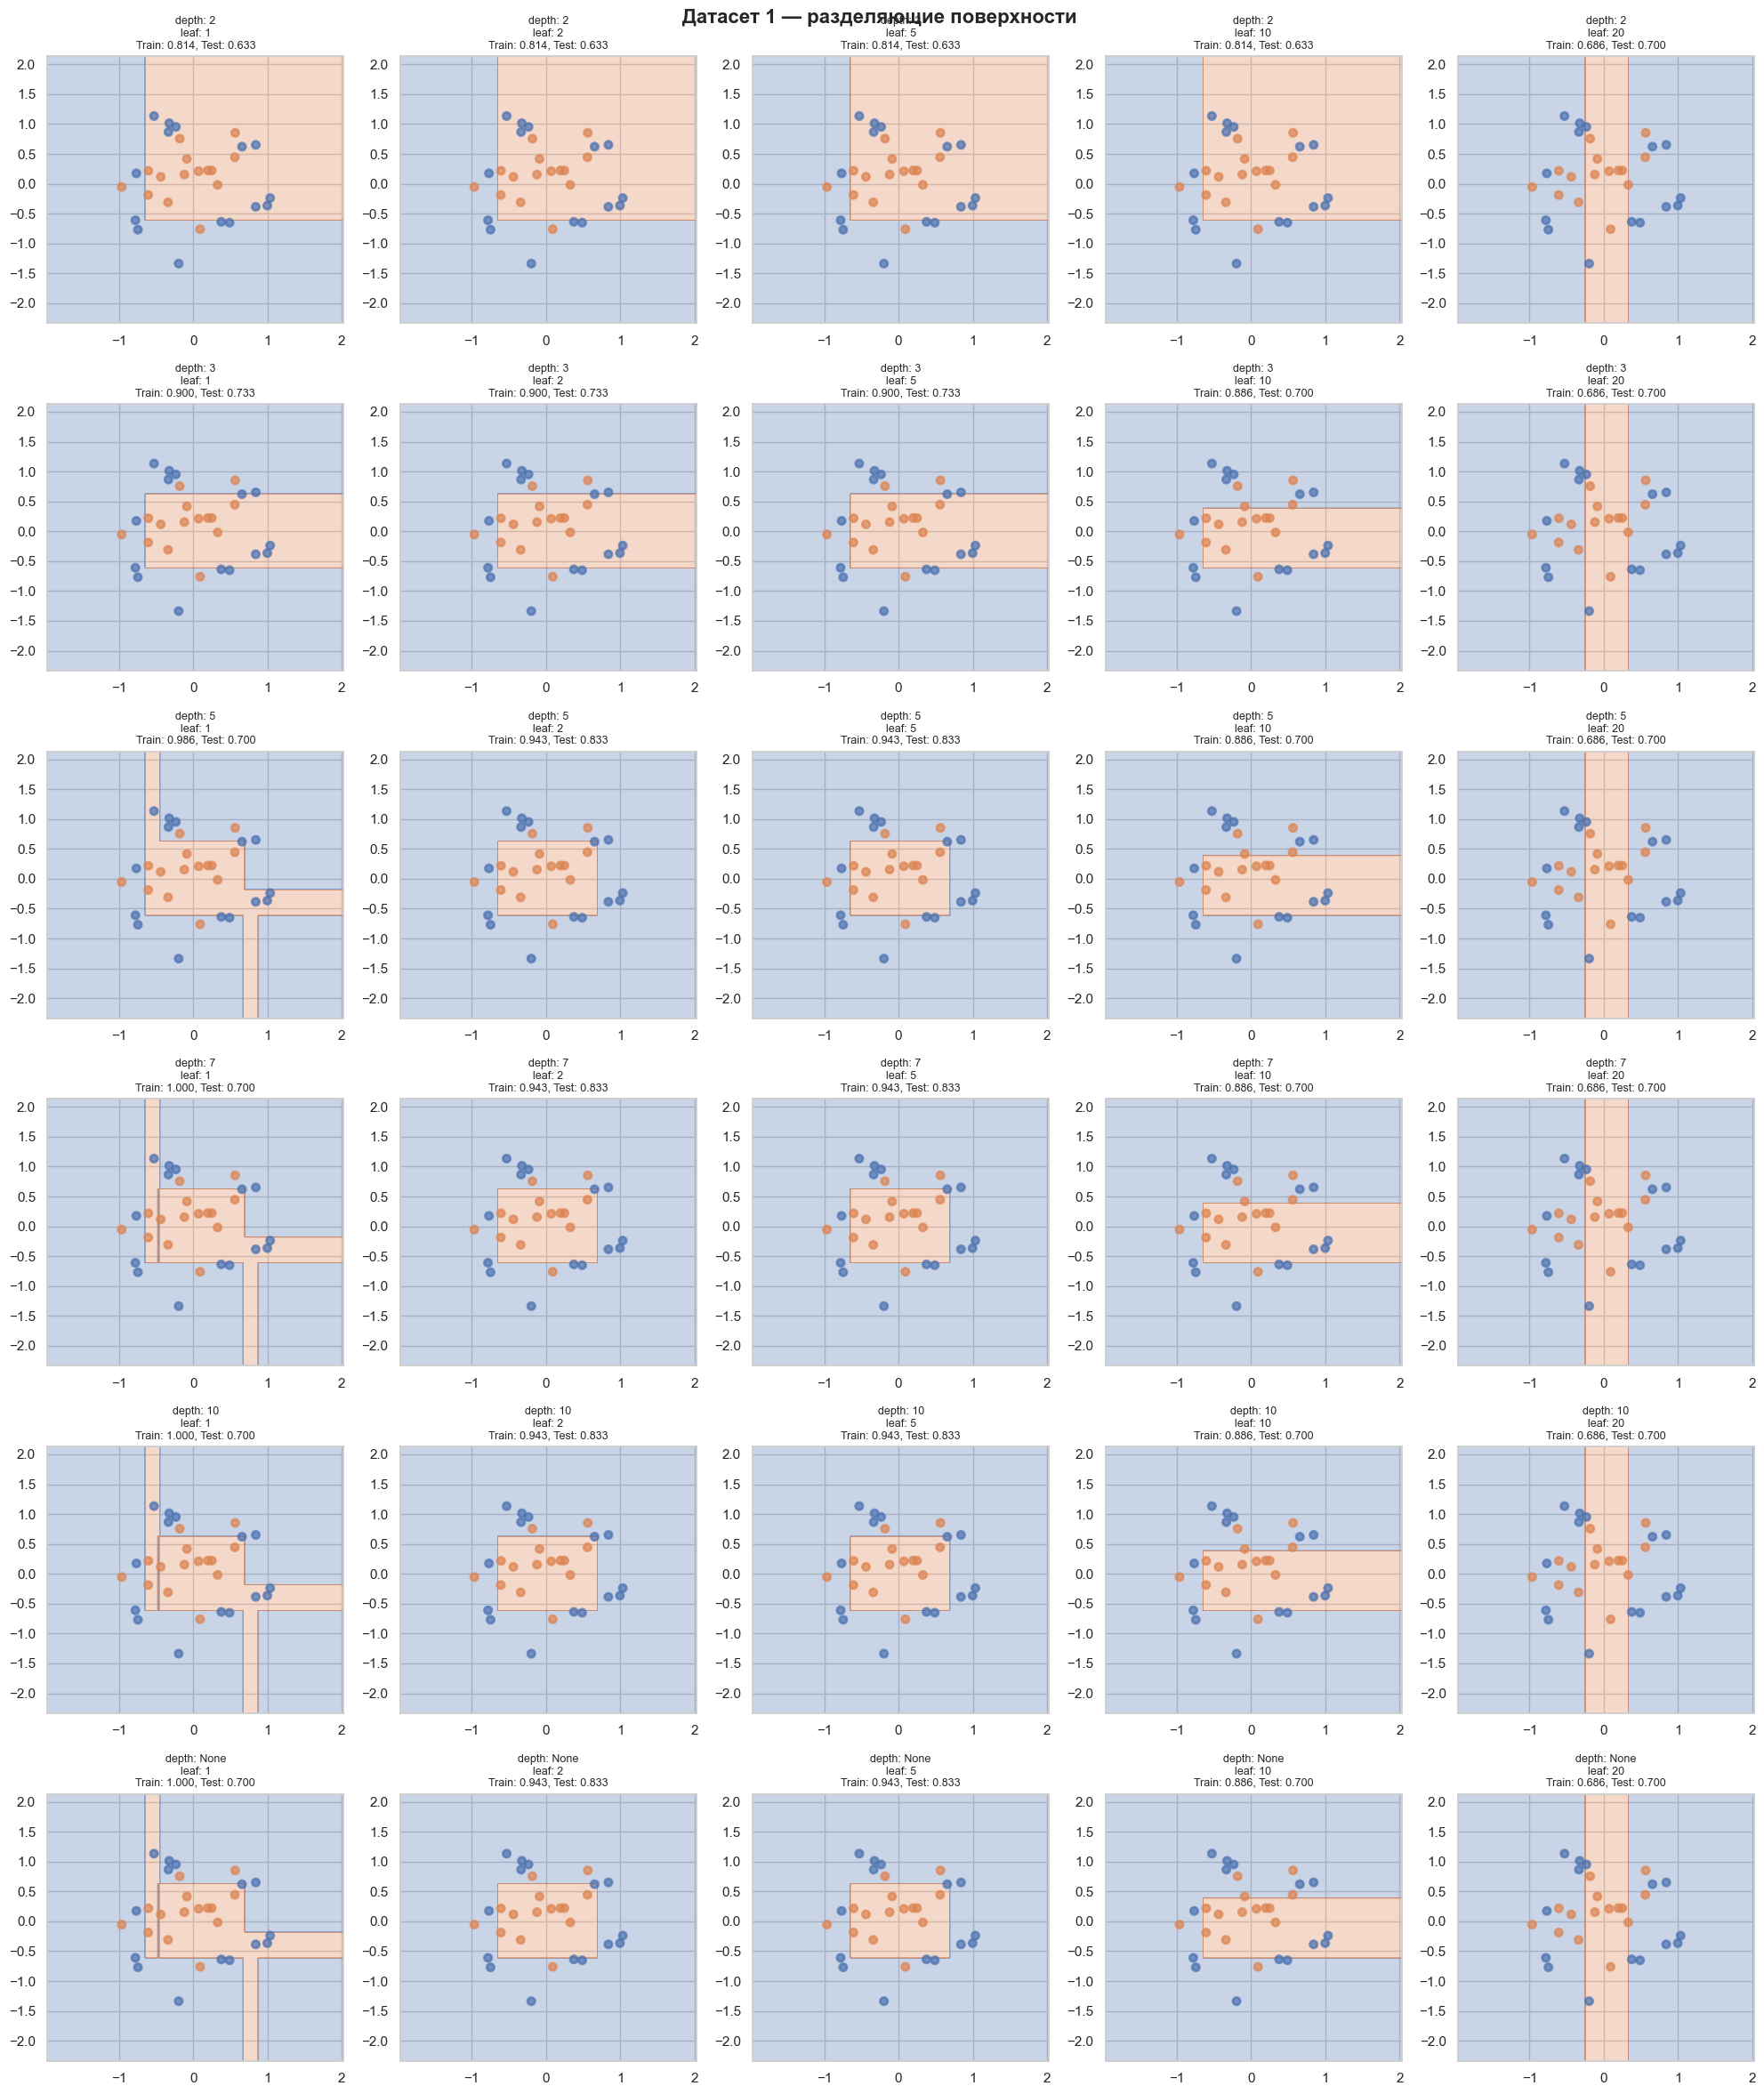

,max_depth,min_samples_leaf,train_acc,test_acc,gap
0,2,1,0.814,0.633,0.181
1,2,2,0.814,0.633,0.181
2,2,5,0.814,0.633,0.181
3,2,10,0.814,0.633,0.181
4,2,20,0.686,0.700,-0.014
5,3,1,0.900,0.733,0.167
6,3,2,0.900,0.733,0.167
7,3,5,0.900,0.733,0.167
8,3,10,0.886,0.700,0.186
9,3,20,0.686,0.700,-0.014



ANALYSIS:
 Best test accuracy: 0.833 при max_depth=5, min_samples_leaf=2
 Train acc: 0.943; Overfit gap = 0.110
 Худшее переобучение: gap=0.300 при depth=7, leaf=1

ВЫВОД:
 Dataset 1 (Circles): сложная нелинейная граница. Хорошая test-accuracy достигается при достаточной глубине,
---------------------------------------------------------------------- 



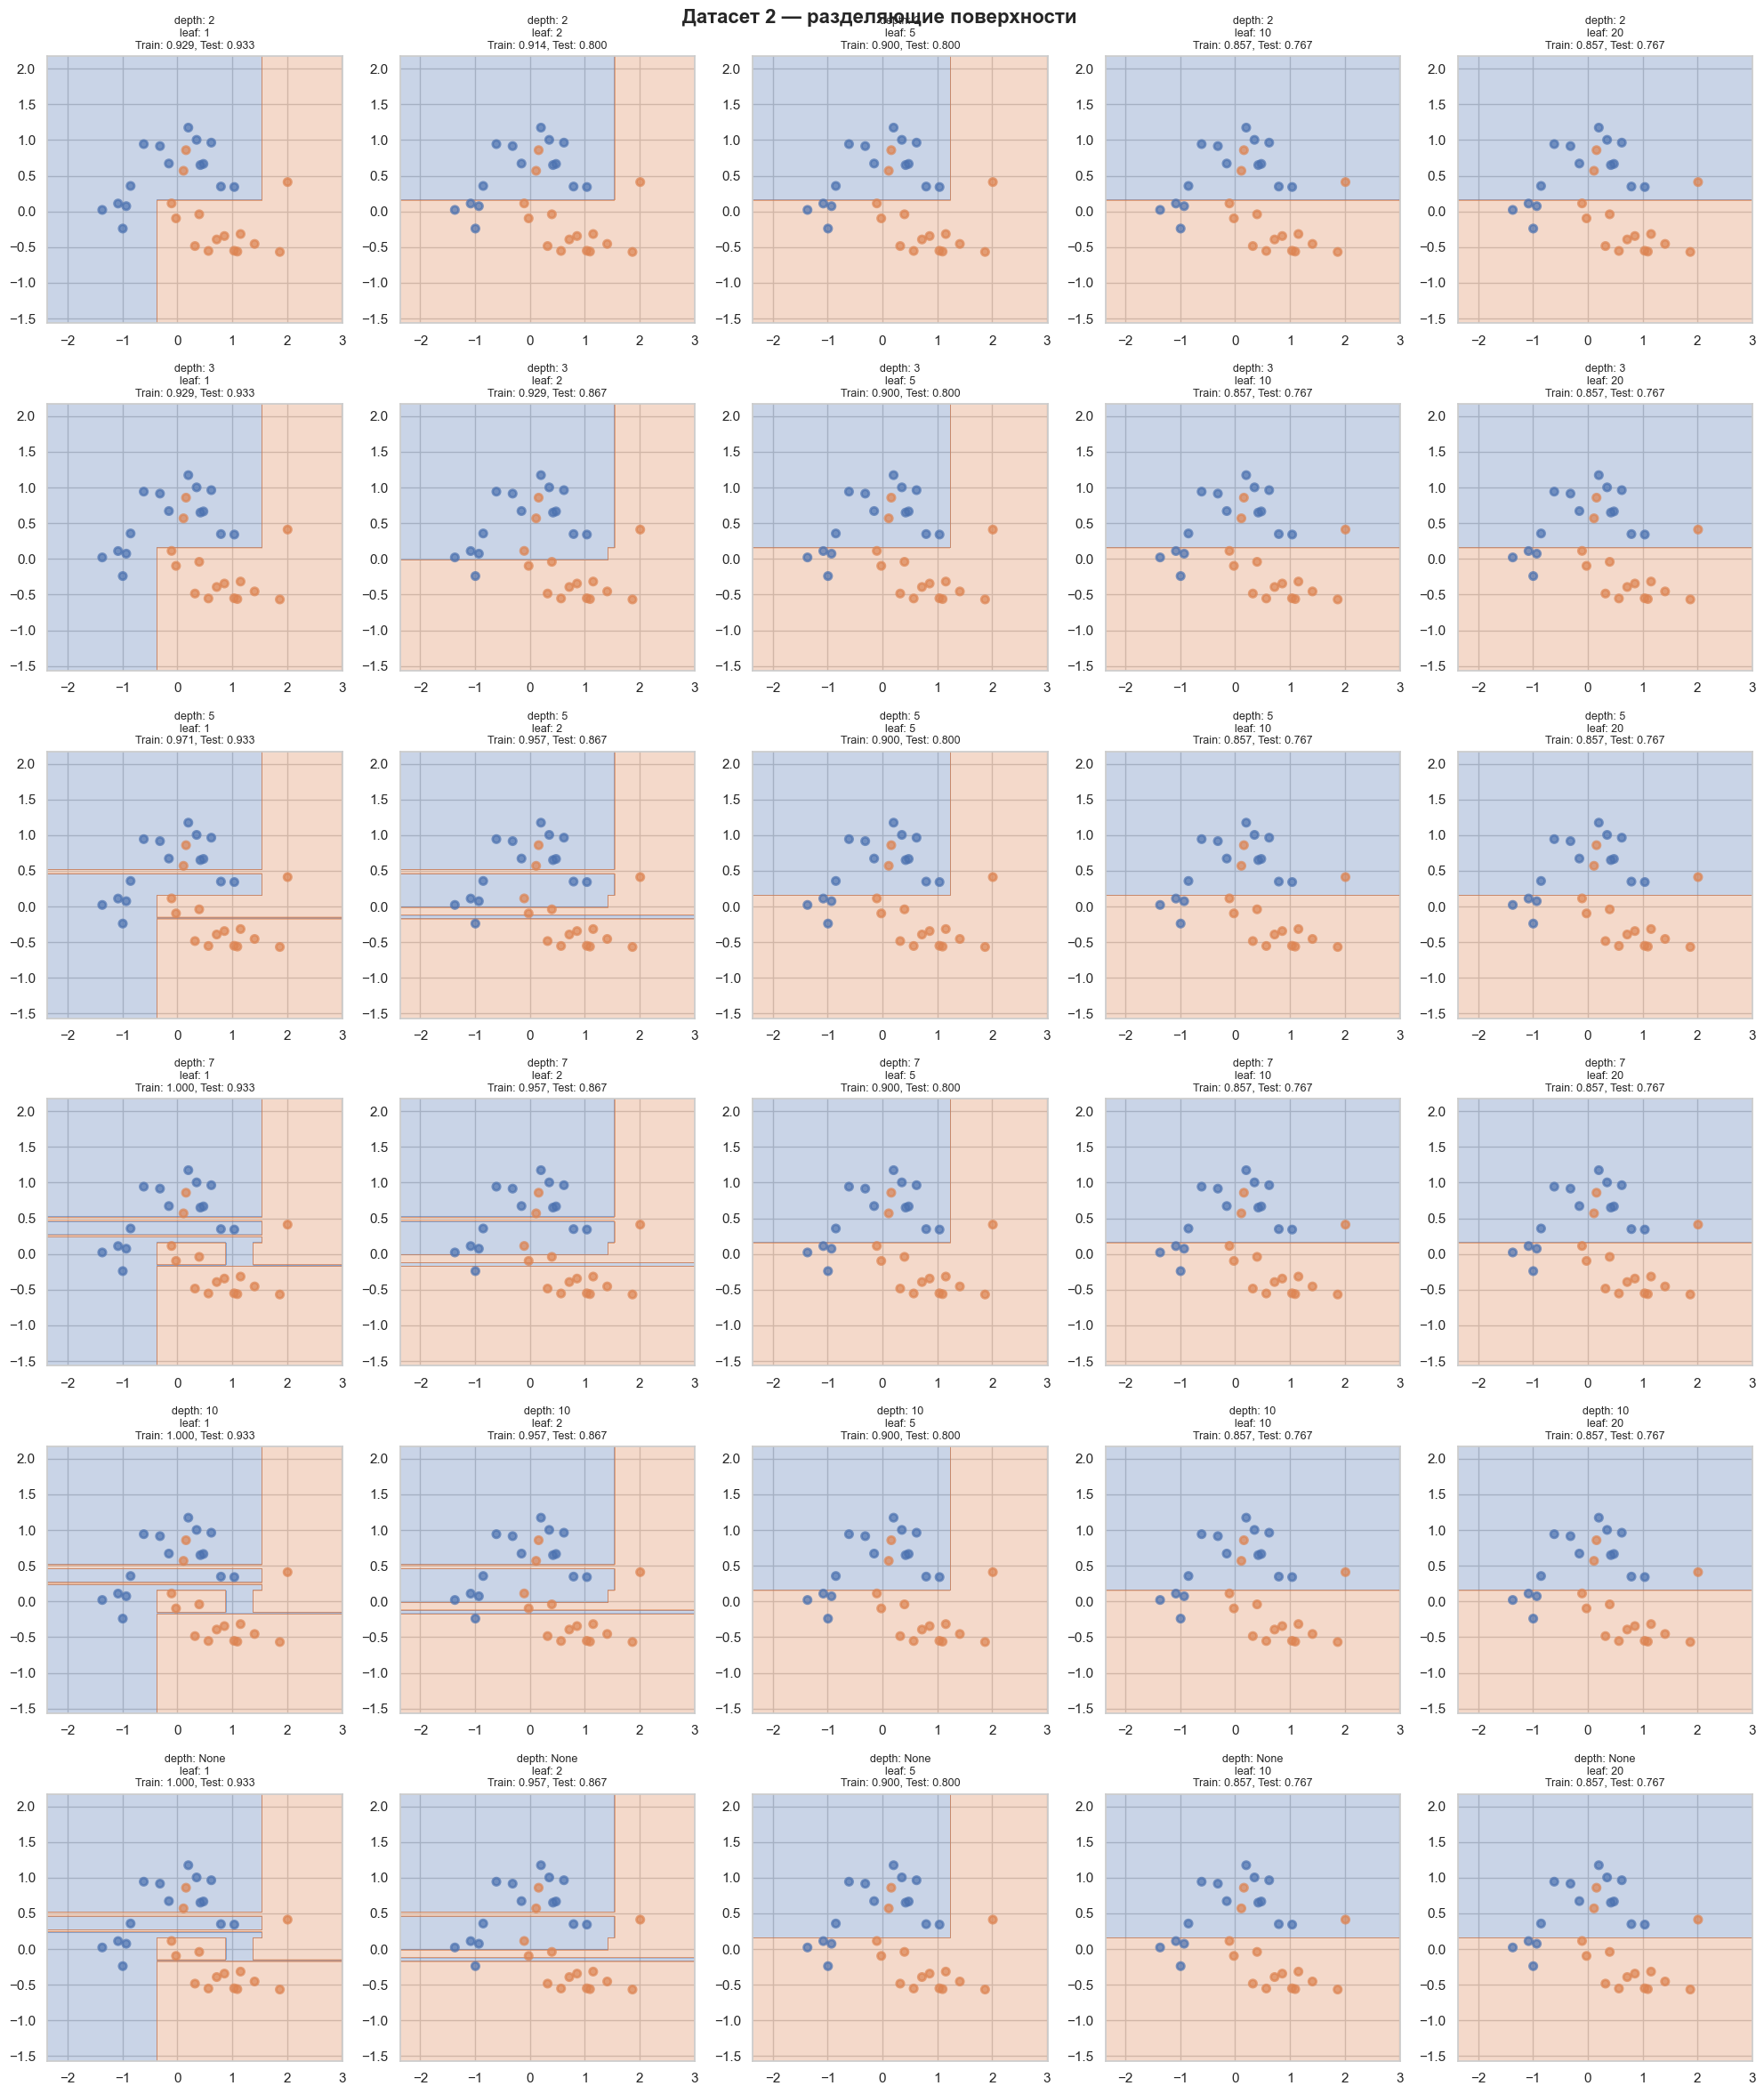

,max_depth,min_samples_leaf,train_acc,test_acc,gap
0,2,1,0.929,0.933,-0.005
1,2,2,0.914,0.800,0.114
2,2,5,0.900,0.800,0.100
3,2,10,0.857,0.767,0.090
4,2,20,0.857,0.767,0.090
5,3,1,0.929,0.933,-0.005
6,3,2,0.929,0.867,0.062
7,3,5,0.900,0.800,0.100
8,3,10,0.857,0.767,0.090
9,3,20,0.857,0.767,0.090



ANALYSIS:
 Best test accuracy: 0.933 при max_depth=2, min_samples_leaf=1
 Train acc: 0.929; Overfit gap = -0.005
 Худшее переобучение: gap=0.114 при depth=2, leaf=2

ВЫВОД:
 Dataset 2 (Moons): полумесяцеобразная структура. Небольшая глубина часто достаточна; сильное увеличение depth
---------------------------------------------------------------------- 



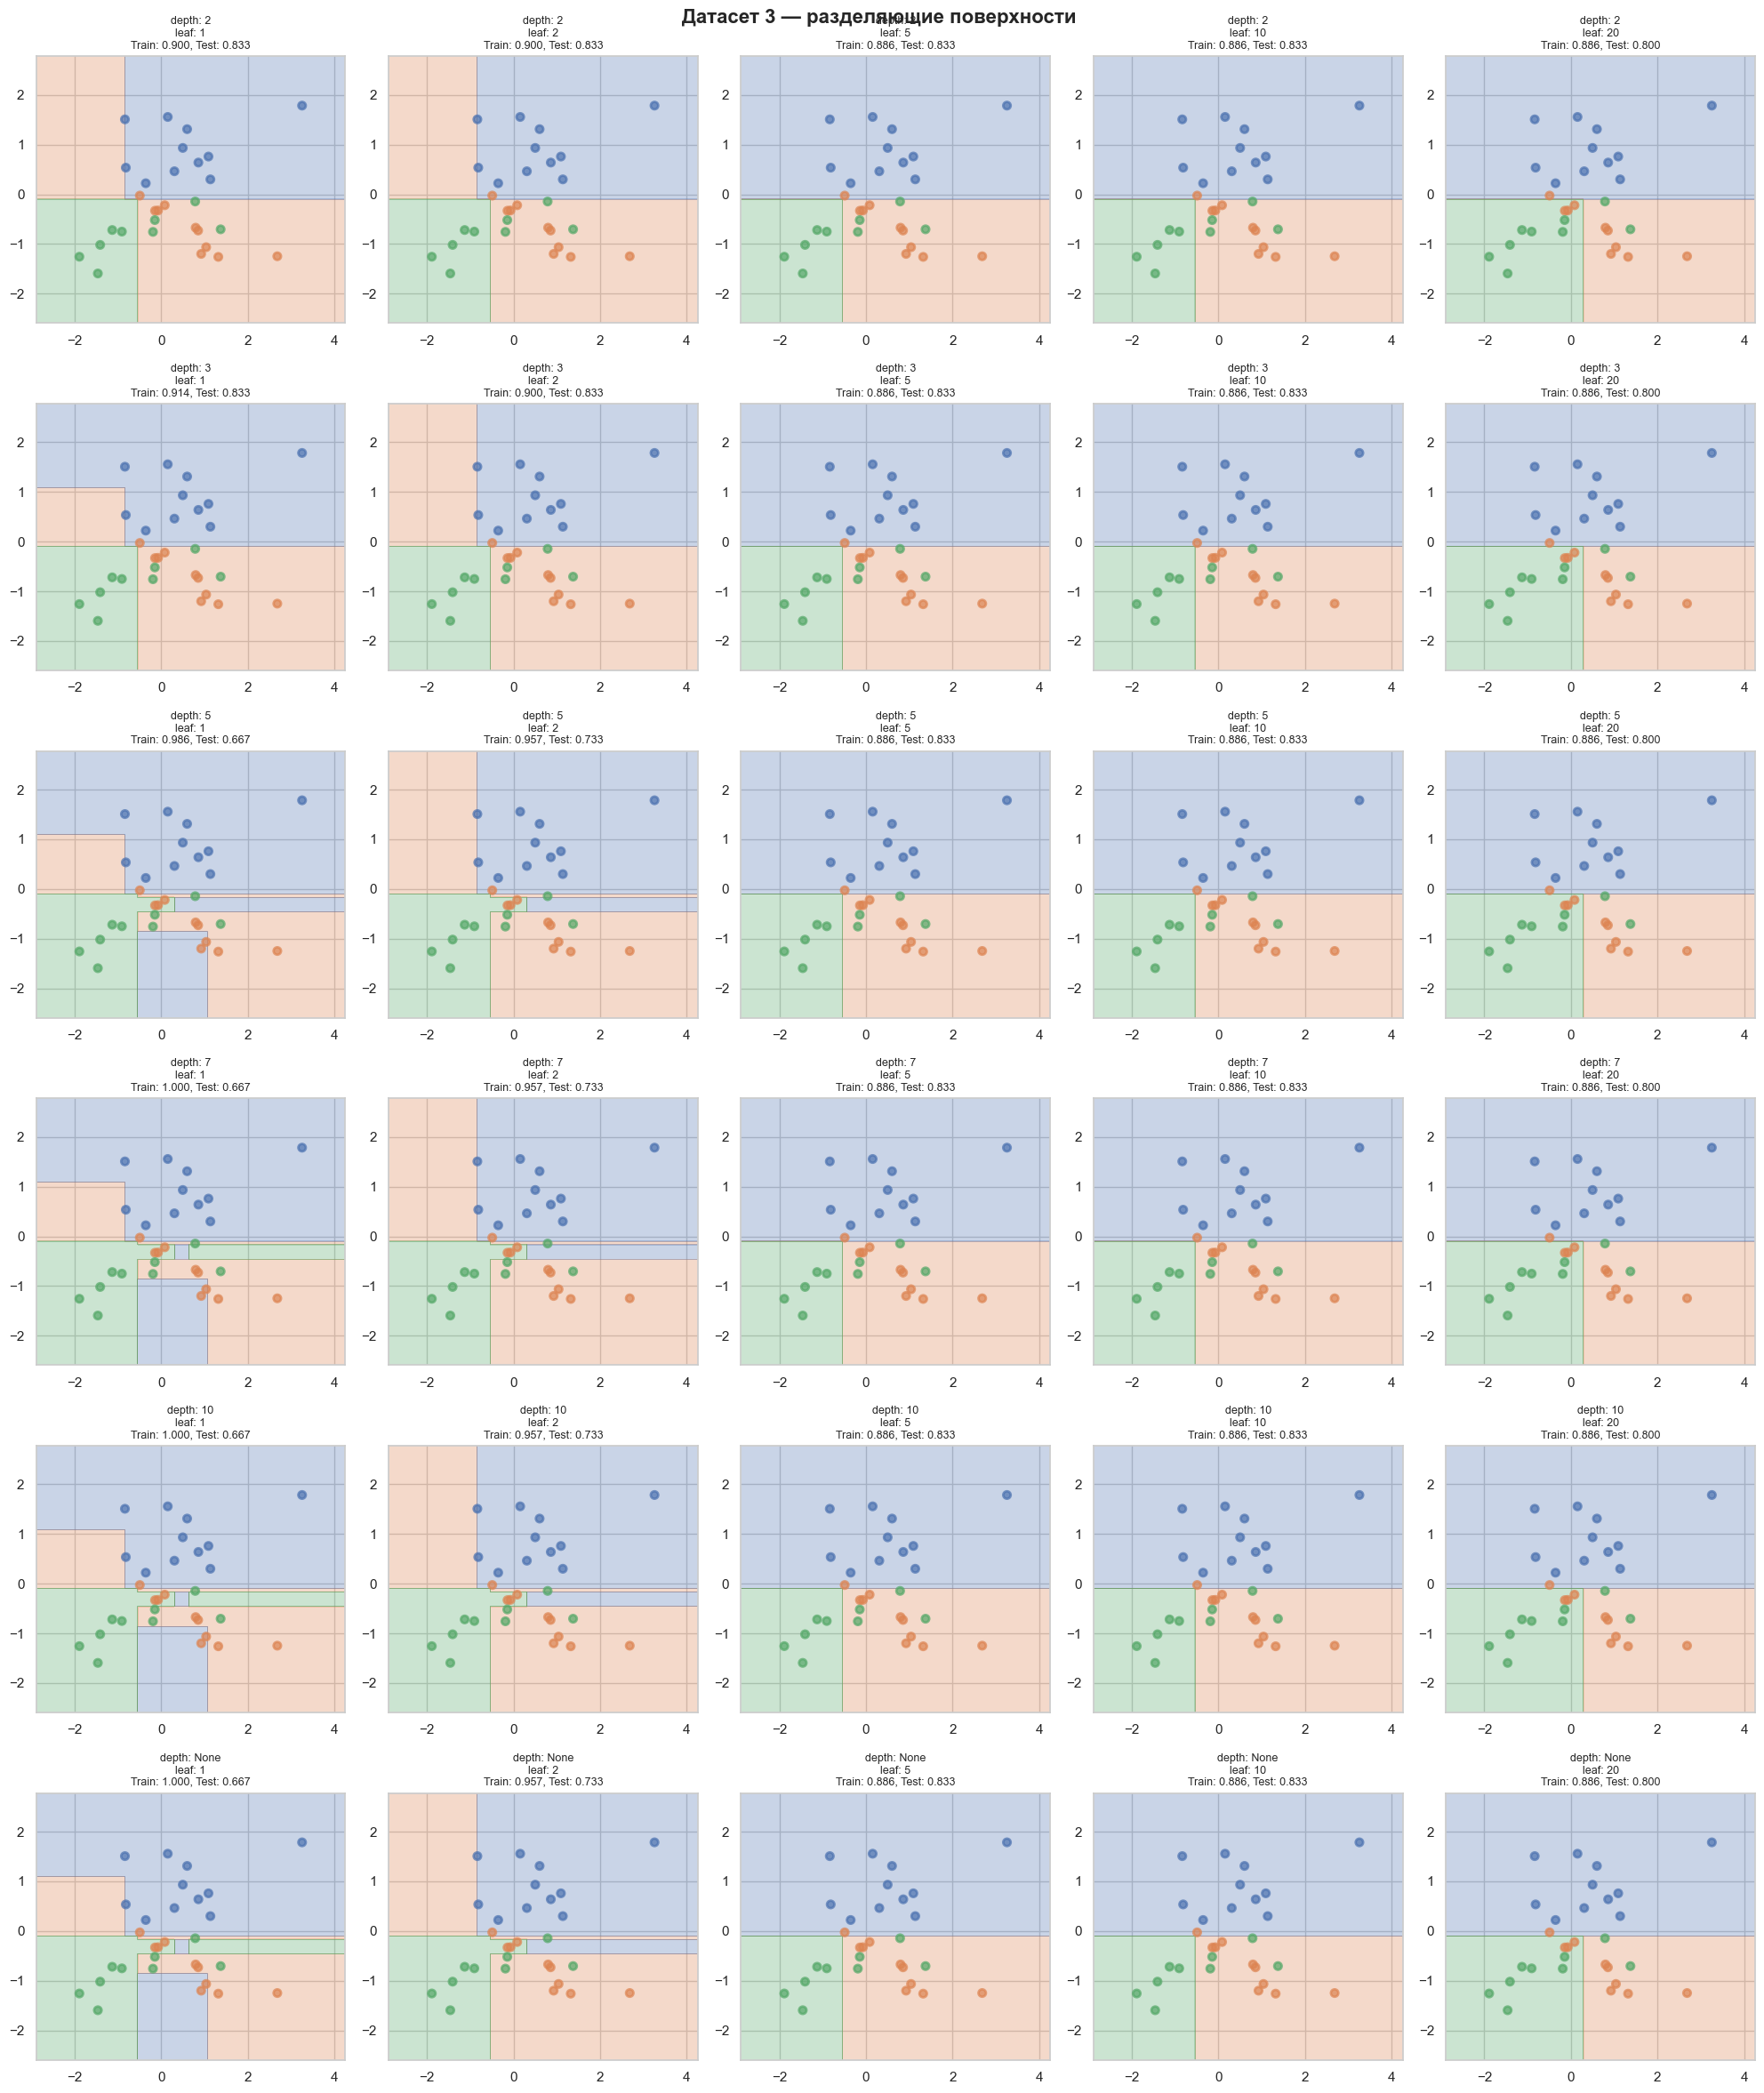

,max_depth,min_samples_leaf,train_acc,test_acc,gap
0,2,1,0.900,0.833,0.067
1,2,2,0.900,0.833,0.067
2,2,5,0.886,0.833,0.052
3,2,10,0.886,0.833,0.052
4,2,20,0.886,0.800,0.086
5,3,1,0.914,0.833,0.081
6,3,2,0.900,0.833,0.067
7,3,5,0.886,0.833,0.052
8,3,10,0.886,0.833,0.052
9,3,20,0.886,0.800,0.086



ANALYSIS:
 Best test accuracy: 0.833 при max_depth=2, min_samples_leaf=1
 Train acc: 0.900; Overfit gap = 0.067
 Худшее переобучение: gap=0.333 при depth=7, leaf=1

ВЫВОД:
 Dataset 3: средняя сложность — оптимум достигается при балансе depth и min_samples_leaf.
---------------------------------------------------------------------- 



In [9]:
sns.set(style='whitegrid')

max_depths = [2, 3, 5, 7, 10, None]
min_samples_leaves = [1, 2, 5, 10, 20]

TEST_SIZE = 0.3
RANDOM_STATE = 42

show_train_matrix_side_by_side = False

for ds_idx, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE,
        stratify=y if len(np.unique(y)) > 1 else None
    )

    n_rows = len(max_depths)
    n_cols = len(min_samples_leaves)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows), squeeze=False)
    fig.suptitle(f'Датасет {ds_idx+1} — разделяющие поверхности ', fontsize=16, fontweight='bold')

    train_scores = np.zeros((n_rows, n_cols))
    test_scores = np.zeros((n_rows, n_cols))
    gap_scores = np.zeros((n_rows, n_cols))

    for i, md in enumerate(max_depths):
        for j, leaf in enumerate(min_samples_leaves):
            tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf=leaf, random_state=RANDOM_STATE)
            tree.fit(X_train, y_train)

            train_acc = accuracy_score(y_train, tree.predict(X_train))
            test_acc = accuracy_score(y_test, tree.predict(X_test))

            train_scores[i, j] = train_acc
            test_scores[i, j] = test_acc
            gap_scores[i, j] = train_acc - test_acc

            ax = axes[i][j]
            plt.sca(ax)                   
            plot_surface(tree, X_test, y_test)  

            depth_label = 'None' if md is None else md
            ax.set_title(f'depth: {depth_label}\nleaf: {leaf}\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}',
                         fontsize=9)
    plt.tight_layout()
    plt.show()

    rows = []
    for i, md in enumerate(max_depths):
        for j, leaf in enumerate(min_samples_leaves):
            rows.append({
                'max_depth': 'None' if md is None else md,
                'min_samples_leaf': leaf,
                'train_acc': round(float(train_scores[i, j]), 3),
                'test_acc': round(float(test_scores[i, j]), 3),
                'gap': round(float(gap_scores[i, j]), 3)
            })
    df = pd0.DataFrame(rows)
    display(df)

    best_idx = np.unravel_index(np.nanargmax(test_scores), test_scores.shape)
    worst_overfit_idx = np.unravel_index(np.nanargmax(gap_scores), gap_scores.shape)
    best_md = max_depths[best_idx[0]]
    best_leaf = min_samples_leaves[best_idx[1]]
    print("\nANALYSIS:")
    print(f" Best test accuracy: {test_scores[best_idx]:.3f} при max_depth={best_md}, min_samples_leaf={best_leaf}")
    print(f" Train acc: {train_scores[best_idx]:.3f}; Overfit gap = {gap_scores[best_idx]:.3f}")
    print(f" Худшее переобучение: gap={gap_scores[worst_overfit_idx]:.3f} при depth={max_depths[worst_overfit_idx[0]]}, leaf={min_samples_leaves[worst_overfit_idx[1]]}")

    print("\nВЫВОД:")
    if ds_idx == 0:
        print(" Dataset 1 (Circles): сложная нелинейная граница. Хорошая test-accuracy достигается при достаточной глубине,")
    elif ds_idx == 1:
        print(" Dataset 2 (Moons): полумесяцеобразная структура. Небольшая глубина часто достаточна; сильное увеличение depth")
    else:
        print(" Dataset 3: средняя сложность — оптимум достигается при балансе depth и min_samples_leaf.")
    print("-" * 70, "\n")


__Ответ:__
По результатам анализа видно, что сложность разделяющей поверхности сильно влияет на разницу между качеством на обучении и тесте: слишком гибкие модели начинают переобучаться, а более сглаженные — теряют точность. Для разных датасетов оптимальный уровень сложности модели оказался разным: более запутанные данные требуют гибкости, а простые формы — более аккуратной регуляризации.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

    STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0
(258, 6)
Признаки: ['STG', 'SCG', 'STR', 'LPR', 'PEG']
Классы: [0 1]


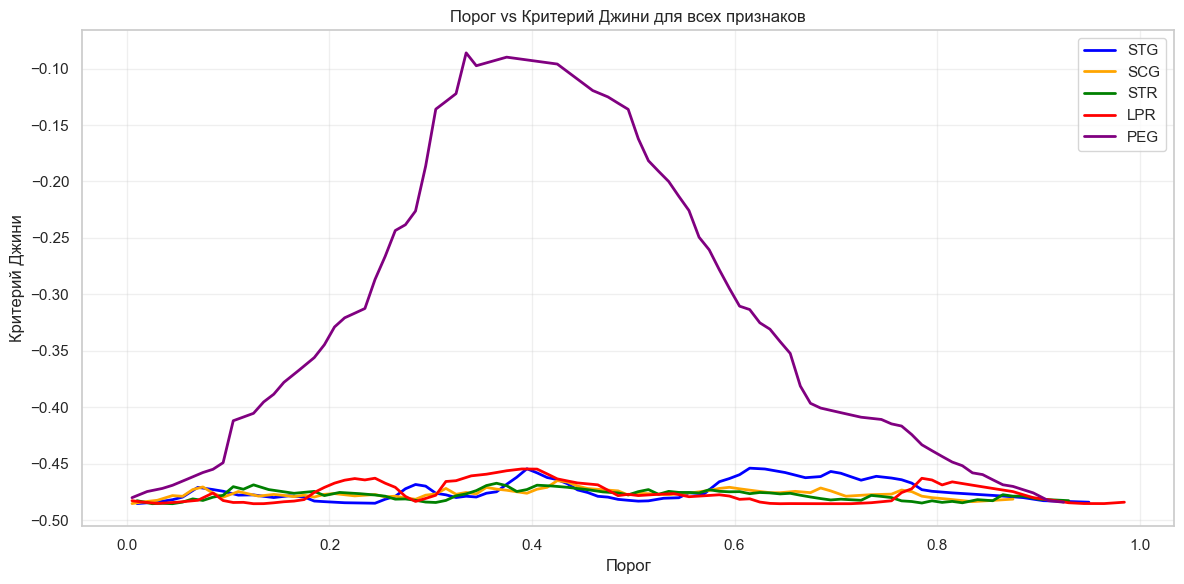

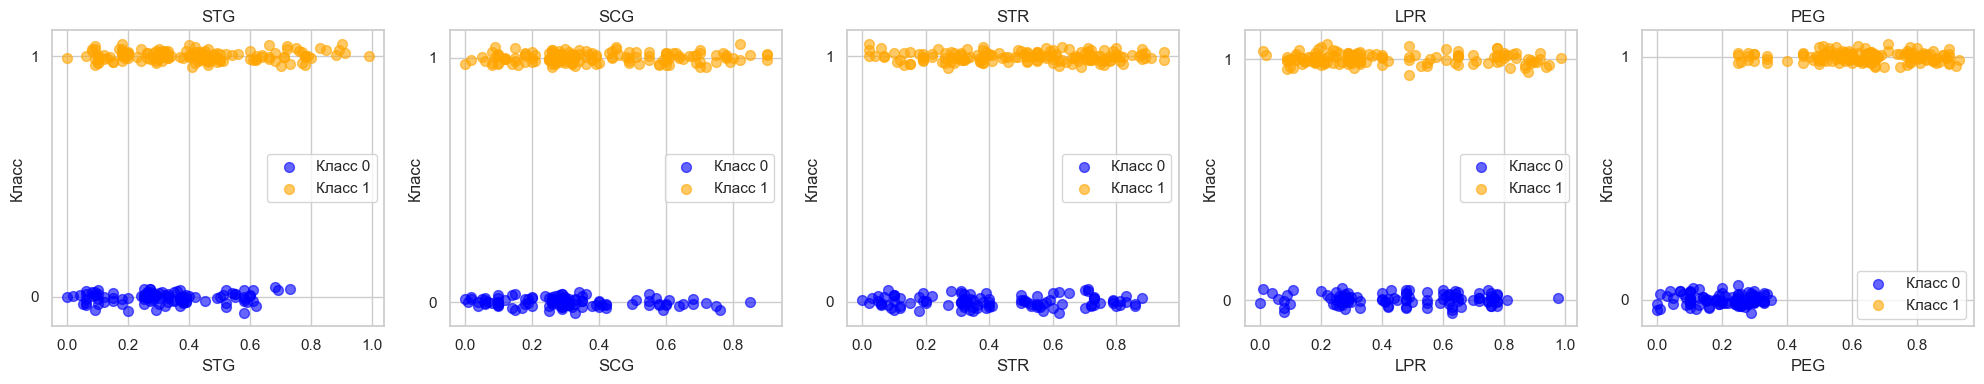

In [11]:
from hw2code import find_best_split   


df = pd0.read_csv('students.csv')

X = df.iloc[:, :5].values
y = df.iloc[:, -1].values
feature_names = df.columns[:5].tolist()

print(df.head())
print(df.shape)
print("Признаки:", feature_names)
print("Классы:", np.unique(y))

plt.figure(figsize=(12, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple']

for col_idx, feature_name in enumerate(feature_names):
    feature_values = X[:, col_idx]

    thresholds, gini_scores, _, _ = find_best_split(feature_values, y)

    plt.plot(thresholds, gini_scores,
             color=colors[col_idx],
             linewidth=2,
             label=feature_name)

plt.xlabel('Порог')
plt.ylabel('Критерий Джини')
plt.title('Порог vs Критерий Джини для всех признаков')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for col_idx, feature_name in enumerate(feature_names):
    for cls in [0, 1]:
        mask = y == cls
        axes[col_idx].scatter(
            X[mask, col_idx],
            np.ones(np.sum(mask)) * cls + np.random.normal(0, 0.02, np.sum(mask)),
            alpha=0.6,
            label=f'Класс {cls}',
            color=['blue', 'orange'][cls],
            s=50
        )

    axes[col_idx].set_xlabel(feature_name)
    axes[col_idx].set_ylabel('Класс')
    axes[col_idx].set_title(feature_name)
    axes[col_idx].set_yticks([0, 1])
    axes[col_idx].legend()

plt.tight_layout()
plt.show()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Исходя из кривых критерия Джини, лучшим признаком является PEG, так как его кривая имеет выраженную глубокую впадину и сильно выделяется относительно остальных. Это полностью согласуется со scatter-графиками: по PEG классы визуально лучше всего разделены, почти без перекрытий. Для «хороших» признаков характерна резкая и глубокая минимальная точка кривой Джини — она показывает, что существует порог, при котором выборка делится почти идеально. Для «плохих» признаков кривая почти плоская, без выраженных минимумов, что означает отсутствие чёткого разделяющего порога и сильное смешивание классов.


__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from hw2code import DecisionTree

df = pd0.read_csv("agaricus-lepiota.data", header=None)

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

feature_types = ["categorical"] * X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

acc


1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

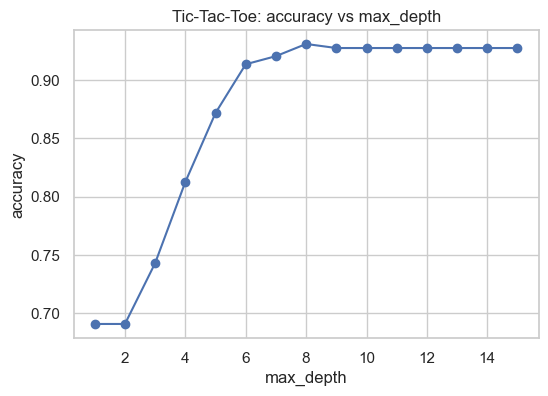

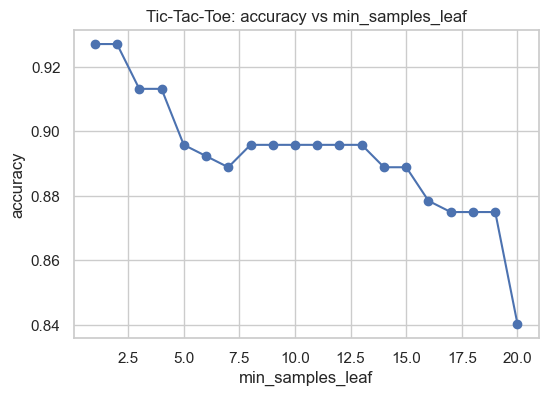

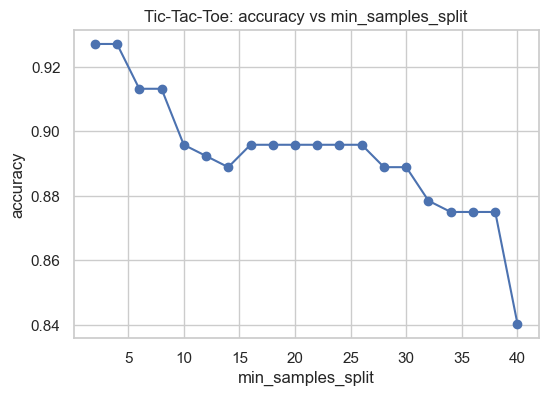

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df_ttt = pd0.read_csv("tic-tac-toe-endgame.csv")

y = LabelEncoder().fit_transform(df_ttt.iloc[:, -1])
X = df_ttt.iloc[:, :-1].apply(LabelEncoder().fit_transform).values

feature_types = ["categorical"] * X.shape[1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

def evaluate(**params):
    tree = DecisionTree(feature_types, **params)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    return accuracy_score(y_test, y_pred)

depths = list(range(1, 16))
acc_depth = [evaluate(max_depth=d) for d in depths]

plt.figure(figsize=(6, 4))
plt.plot(depths, acc_depth, marker='o')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Tic-Tac-Toe: accuracy vs max_depth")
plt.grid(True)
plt.show()


leafs = list(range(1, 21))
acc_leaf = [evaluate(min_samples_leaf=l) for l in leafs]

plt.figure(figsize=(6, 4))
plt.plot(leafs, acc_leaf, marker='o')
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.title("Tic-Tac-Toe: accuracy vs min_samples_leaf")
plt.grid(True)
plt.show()

splits = list(range(2, 41, 2))
acc_split = [evaluate(min_samples_split=s) for s in splits]

plt.figure(figsize=(6, 4))
plt.plot(splits, acc_split, marker='o')
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.title("Tic-Tac-Toe: accuracy vs min_samples_split")
plt.grid(True)
plt.show()


__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from hw2code import DecisionTree   

def encode_label_df(df):
    df_enc = df.copy()
    for col in df_enc.columns:
        df_enc[col] = LabelEncoder().fit_transform(df_enc[col])
    return df_enc


def load_tictactoe():
    df = pd0.read_csv("tic-tac-toe-endgame.csv")
    df = encode_label_df(df)

    y = df.iloc[:, -1].values
    X = df.iloc[:, :-1].values
    return X, y


def load_cars():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
    df = pd0.read_csv(url, names=cols)

    df = encode_label_df(df)

    y_raw = df.iloc[:, -1]
    y = np.where(y_raw <= 1, 0, 1)

    X = df.iloc[:, :-1].values
    return X, y


def load_mushrooms():
    url = "agaricus-lepiota.data"
    cols = [
        "class","cap-shape","cap-surface","cap-color","bruises","odor",
        "gill-attachment","gill-spacing","gill-size","gill-color",
        "stalk-shape","stalk-root","stalk-surface-above-ring",
        "stalk-surface-below-ring","stalk-color-above-ring",
        "stalk-color-below-ring","veil-type","veil-color","ring-number",
        "ring-type","spore-print-color","population","habitat"
    ]
    df = pd0.read_csv(url, names=cols)
    df = encode_label_df(df)

    y = df["class"].values
    X = df.drop(columns=["class"]).values
    return X, y

def load_nursery():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
    cols = [
        "parents", "has_nurs", "form", "children",
        "housing", "finance", "social", "health", "class"
    ]
    df = pd0.read_csv(url, names=cols)

    df = encode_label_df(df)

    y_raw = df["class"]
    y = np.where(y_raw <= 1, 0, 1)

    X = df.drop(columns=["class"]).values
    return X, y


datasets = {
    "mushrooms": load_mushrooms(),
    "tic-tac-toe": load_tictactoe(),
    "cars": load_cars(),
    "nursery": load_nursery()
}

scorer = make_scorer(accuracy_score)

results = {
    "DecisionTree real": [],
    "DecisionTree categorical": [],
    "DecisionTree real + OHE": [],
    "sklearn DTree": []
}

for name, (X, y) in datasets.items():
    print(f"Processing {name}...")

    feature_types_real = ["real"] * X.shape[1]
    model_real = DecisionTree(feature_types=feature_types_real)
    acc_real = cross_val_score(model_real, X, y, cv=10, scoring=scorer).mean()

    feature_types_cat = ["categorical"] * X.shape[1]
    model_cat = DecisionTree(feature_types=feature_types_cat)
    acc_cat = cross_val_score(model_cat, X, y, cv=10, scoring=scorer).mean()

    ohe = OneHotEncoder(sparse_output=False)

    X_ohe = ohe.fit_transform(X)

    feature_types_real_ohe = ["real"] * X_ohe.shape[1]
    model_ohe = DecisionTree(feature_types=feature_types_real_ohe)
    acc_ohe = cross_val_score(model_ohe, X_ohe, y, cv=10, scoring=scorer).mean()

    skl_tree = DecisionTreeClassifier()
    acc_skl = cross_val_score(skl_tree, X, y, cv=10, scoring=scorer).mean()

    results["DecisionTree real"].append(acc_real)
    results["DecisionTree categorical"].append(acc_cat)
    results["DecisionTree real + OHE"].append(acc_ohe)
    results["sklearn DTree"].append(acc_skl)

df_results = pd0.DataFrame(results, index=datasets.keys())
df_results


Processing mushrooms...
Processing tic-tac-toe...
Processing cars...
Processing nursery...


,DecisionTree real,DecisionTree categorical,DecisionTree real + OHE,sklearn DTree
mushrooms,0.999261,1.00000,0.999631,0.961123
tic-tac-toe,0.467533,0.58420,0.543575,0.790428
cars,1.000000,1.00000,1.000000,1.000000
nursery,0.899383,0.89429,0.834259,0.735802


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

Алгоритмы ранжируются по-разному для разных наборов данных: на mushrooms и cars все деревья показывают почти идеальную точность, а на tic-tac-toe лучше справляется стандартное дерево sklearn. Различия объясняются природой признаков: в первых двух датасетах многие признаки высокоинформативны и легко разделяют классы, а в tic-tac-toe важны взаимодействия между признаками. Для nursery кодирование признаков и структура дерева также влияют на точность, поэтому разные алгоритмы показывают разные результаты. Небольшая случайность присутствует из-за разбиения данных на фолды в кросс-валидации и особенностей работы деревьев, её можно уменьшить, фиксируя случайное разбиение и увеличивая число фолдов.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

**Ответ:**
пупупу